In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
import seaborn as sns

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [4]:
# Load the "Carseats" data

Carseats = pd.read_csv('../../../4095/data/Carseats.csv')
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
# Create numeric variables out of the categorical ones

Carseats['Urban_Yes'] = pd.Series(np.zeros(Carseats.shape[0]))
Carseats.loc[Carseats['Urban']=='Yes', 'Urban_Yes'] = 1

Carseats['US_Yes'] = pd.Series(np.zeros(Carseats.shape[0]))
Carseats.loc[Carseats['US']=='Yes', 'US_Yes'] = 1

Carseats['ShelveLoc_rank'] = pd.Series(np.zeros(Carseats.shape[0]))
Carseats.loc[Carseats['ShelveLoc']=='Good', 'ShelveLoc_rank'] = 2
Carseats.loc[Carseats['ShelveLoc']=='Medium', 'ShelveLoc_rank'] = 1

Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_Yes,US_Yes,ShelveLoc_rank
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1.0,1.0,0.0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1.0,1.0,2.0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1.0,1.0,1.0
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,1.0,1.0,1.0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1.0,1.0,2.0
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0.0,1.0,1.0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,1.0,1.0,1.0
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,1.0,1.0,0.0


In [17]:
X = Carseats[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'Urban_Yes', 'US_Yes', 'ShelveLoc_rank']]
y = Carseats['Sales']

X['intercept'] = np.ones(Carseats.shape[0])

/var/folders/06/6n4w3bc97nj6nt382dcybgg00000gp/T/ipykernel_14486/1847244223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = np.ones(Carseats.shape[0])


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=314,
                                                    test_size=0.25,
                                                    shuffle=True) 
Train = pd.merge_ordered(X_train,y_train,left_on=X_train.index,right_on=y_train.index).drop(columns=['key_0'])
Test = pd.merge_ordered(X_test,y_test,left_on=X_test.index,right_on=y_test.index).drop(columns=['key_0'])

/Users/mjl09005/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mjl09005/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mjl09005/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mjl09005/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

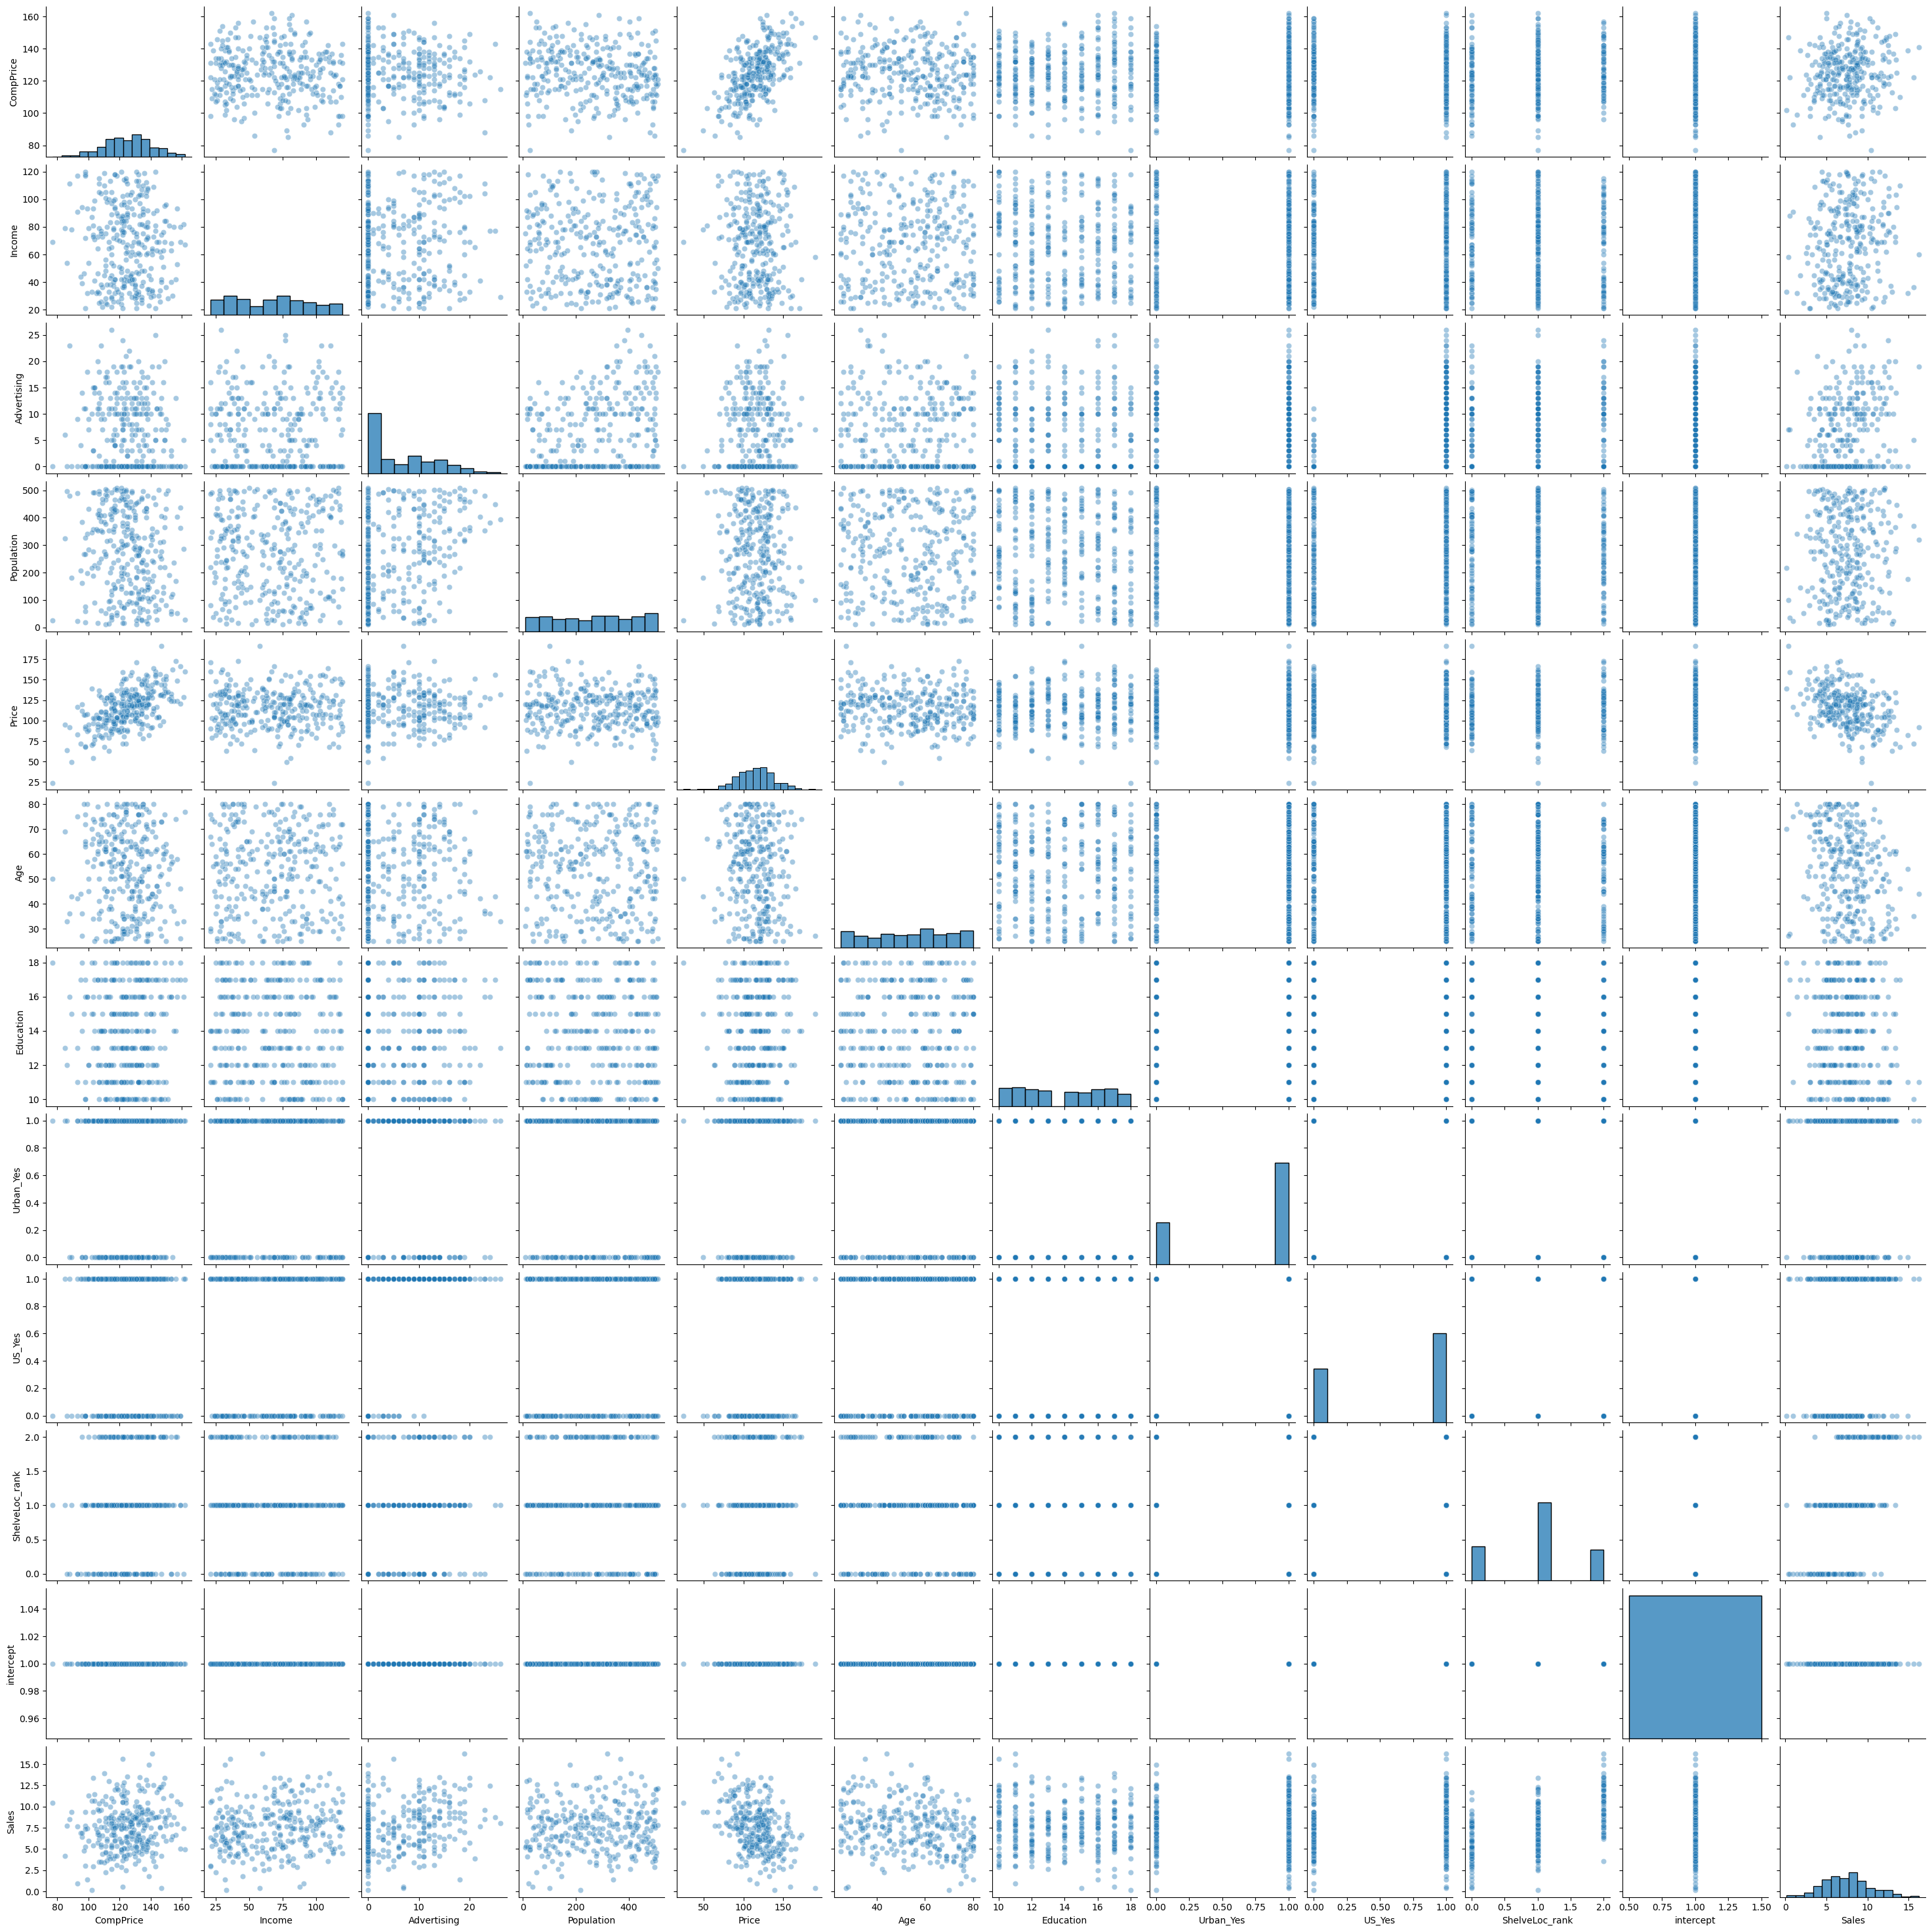

In [19]:
sns.pairplot(Train, kind='scatter', plot_kws={'alpha':0.4})

In [20]:
Train.corr()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,ShelveLoc_rank,intercept,Sales
CompPrice,1.000000,-0.061841,-0.051576,-0.134162,0.585736,-0.069402,0.044574,0.063109,-0.000832,0.106289,NaN,0.112217
Income,-0.061841,1.000000,0.054544,0.003277,-0.017399,0.007548,-0.058973,0.002925,0.055067,-0.027469,NaN,0.140352
Advertising,-0.051576,0.054544,1.000000,0.310507,0.048895,-0.015703,-0.044505,0.001787,0.689279,0.048196,NaN,0.251642
Population,-0.134162,0.003277,0.310507,1.000000,-0.024187,-0.036925,-0.085207,-0.059360,0.087738,-0.037220,NaN,0.050462
Price,0.585736,-0.017399,0.048895,-0.024187,1.000000,-0.082764,0.042830,0.068722,0.066214,0.069659,NaN,-0.410113
Age,-0.069402,0.007548,-0.015703,-0.036925,-0.082764,1.000000,-0.014264,-0.028223,-0.004497,-0.005289,NaN,-0.245444
Education,0.044574,-0.058973,-0.044505,-0.085207,0.042830,-0.014264,1.000000,0.002067,-0.073519,-0.059861,NaN,-0.085537
Urban_Yes,0.063109,0.002925,0.001787,-0.059360,0.068722,-0.028223,0.002067,1.000000,0.018647,-0.065588,NaN,-0.018922
US_Yes,-0.000832,0.055067,0.689279,0.087738,0.066214,-0.004497,-0.073519,0.018647,1.000000,0.044444,NaN,0.153924
ShelveLoc_rank,0.106289,-0.027469,0.048196,-0.037220,0.069659,-0.005289,-0.059861,-0.065588,0.044444,1.000000,NaN,0.570685


In [24]:
# It looks like ShelveLoc_rank, Price, Advertising, and Age are most predictive, 
    # as they all have correlation coefficients with Sales of at least 0.25.
# These 4 variables don't appear to be correlated with each other, either. 

model = sm.OLS(y_train, X_train[['intercept','ShelveLoc_rank','Price','Advertising','Age']])
results = model.fit()
summarize(results)

/Users/mjl09005/anaconda3/lib/python3.11/site-packages/ISLP/models/__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),


,coef,std err,t,P>|t|
intercept,13.8171,0.606,22.799,0.0
ShelveLoc_rank,2.4727,0.141,17.525,0.0
Price,-0.0590,0.004,-14.360,0.0
Advertising,0.1022,0.014,7.196,0.0
Age,-0.0478,0.006,-8.260,0.0


In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     147.3
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           4.79e-69
Time:                        15:51:32   Log-Likelihood:                -572.46
No. Observations:                 300   AIC:                             1155.
Df Residuals:                     295   BIC:                             1173.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         13.8171      0.606     22.799      0.000      12.624      15.010
ShelveLoc_rank     2.4727      0.141     17.525      0.000       2.195       2.750
Price             -0.0590      0.004    -14.360      0.000      -0.067      -0.051
Advertising        0.1022      0.014      7.196      0.000       0.074       0.130
Age               -0.0478      0.006     -8.260      0.000      -0.059      -0.036
==============================================================================
Omnibus:                        0.039   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.109
Skew:                          -0.023   Prob(JB):                        0.947
Kurtosis:                       2.918   Cond. No.                         824.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Create helper functions for computing the mean squared error

def predict(X, model):
    # the built-in get_prediction tool returns an array, so we need to convert to a dataframe
    predictions_df = pd.DataFrame(model.get_prediction(X).predicted, columns=['y_hat'], index=X.index)
    return predictions_df['y_hat']

def mse(y, y_hat):
    # calculate the residual error for each individual record
    resid = y - y_hat
    # square the residual (hence "squared error")
    sq_resid = resid**2
    # calculate the sum of squared errors
    SSR = sum(sq_resid)
    # divide by the number of records to get the mean squared error
    MSE = SSR / y.shape[0]
    return MSE

In [33]:
# Get the predictions so that we can calculate mse and build lift charts

predictions_train = predict(X_train[['intercept','ShelveLoc_rank','Price','Advertising','Age']], results)
print('mse train:',mse(y_train, predictions_train))
predictions_test = predict(X_test[['intercept','ShelveLoc_rank','Price','Advertising','Age']], results)
print('mse test:',mse(y_test, predictions_test))

mse train: 2.660473658655613
mse test: 2.158646258752836


In [40]:
# Create helper function for displaying gains charts

from sklearn.metrics import auc

def gains_chart(actuals, predictions, num_buckets=10):
    # Combine actuals and predictions into a single DataFrame
    results = np.asarray([actuals, predictions]).T
    # Sort by predictions descending
    results = results[results[:,1].argsort()[::-1]]

    # Calculate total number of instances and cumulative count
    total_count = len(results)
    cumulative_count = np.arange(1, total_count + 1) / total_count

    # Calculate cumulative actuals
    cumulative_actuals = np.cumsum(results[:,0])

    # Calculate cumulative baseline (if predictions were randomly sorted)
    baseline = np.arange(1, total_count + 1) * np.sum(actuals) / total_count

    # Calculate gains
    gains = cumulative_actuals / np.sum(actuals)

    # Calculate AUC (Area Under the Gains Curve)
    auc_score = auc(cumulative_count, gains)

    # Plotting the gains chart
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_count, gains, marker='o', linestyle='-', color='b', label=f'Gains Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Baseline')
    plt.title('Gains Chart for Regression Model')
    plt.xlabel('Percentage of Population')
    plt.ylabel('Cumulative Gains')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print AUC
    print(f"Area Under the Gains Curve (AUC): {auc_score:.4f}")

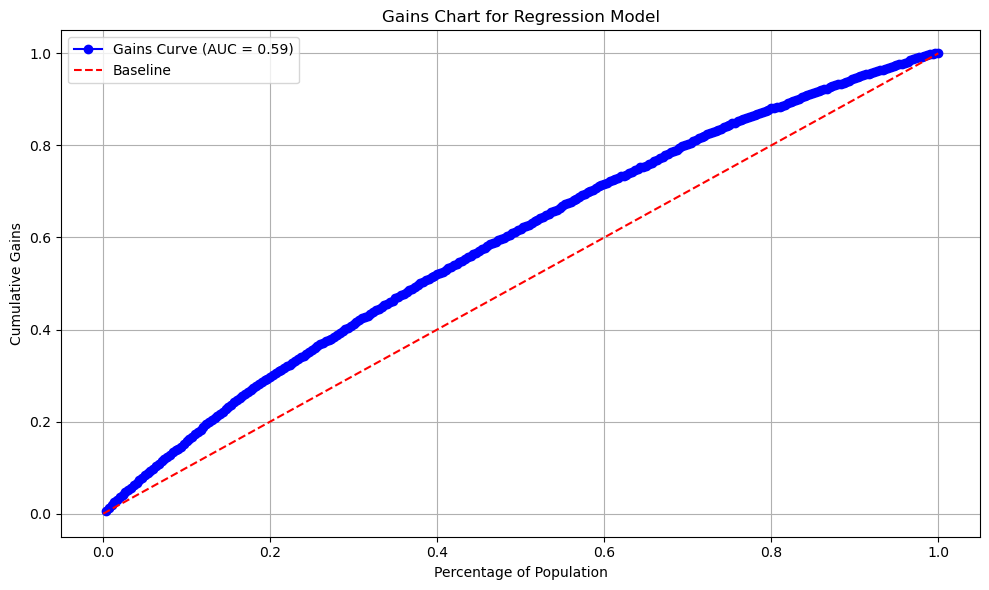

Area Under the Gains Curve (AUC): 0.5861


In [41]:
gains_chart(y_train,predictions_train)

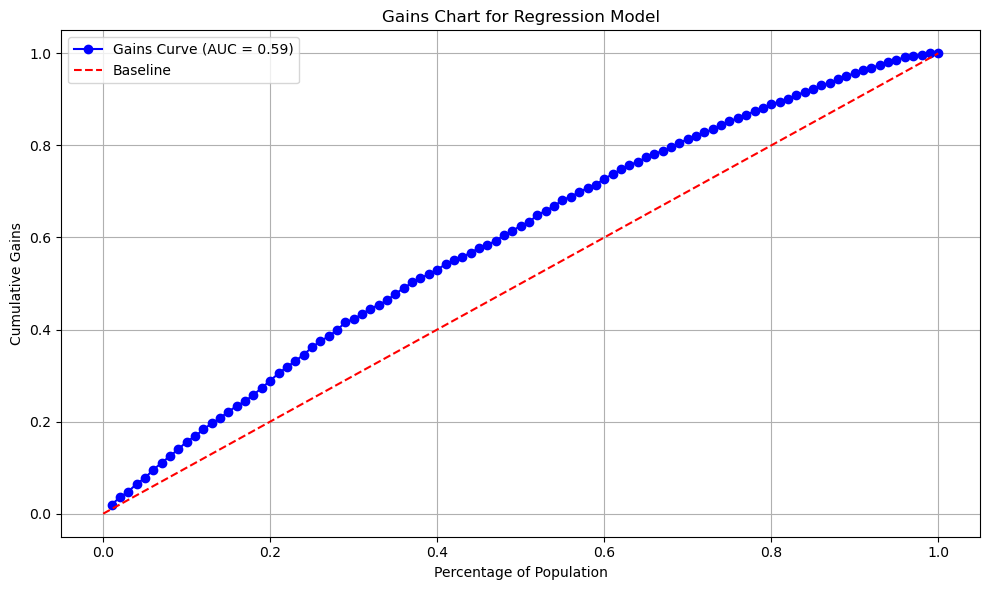

Area Under the Gains Curve (AUC): 0.5920


In [42]:
gains_chart(y_test,predictions_test)

In [29]:
# Create helper function for displaying lift charts

def lift_chart_regression(actuals, predictions, num_buckets=10):
    # Combine actuals and predictions into a single DataFrame
    results = np.asarray([actuals, predictions]).T
    # Sort by predictions descending
    results = results[results[:,1].argsort()[::-1]]

    # Calculate total number of instances and cumulative count
    total_count = len(results)
    cumulative_count = np.arange(1, total_count + 1) / total_count

    # Calculate cumulative actuals
    cumulative_actuals = np.cumsum(results[:,0])

    # Calculate cumulative baseline (if predictions were randomly sorted)
    baseline = np.arange(1, total_count + 1) * np.sum(actuals) / total_count

    # Calculate lift
    lift = cumulative_actuals / baseline

    # Calculate cumulative lift
    cumulative_lift = np.cumsum(lift)

    # Plotting the lift chart
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_count, cumulative_lift, marker='o', linestyle='-', color='b', label='Lift Curve')
    plt.plot([0, 1], [1, 1], linestyle='--', color='r', label='Baseline')
    plt.title('Lift Chart for Regression Model')
    plt.xlabel('Percentage of Population')
    plt.ylabel('Lift')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

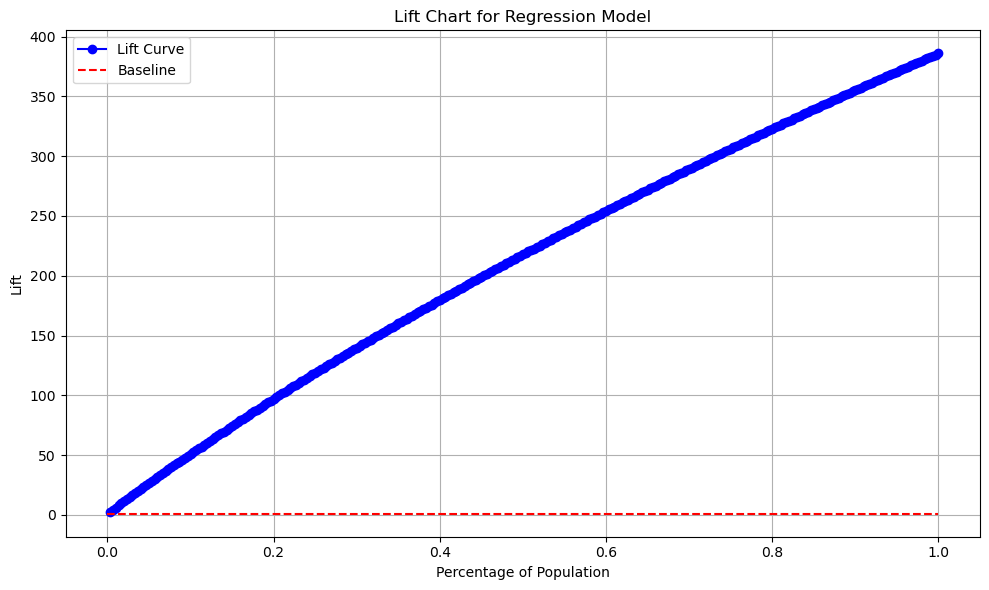

In [30]:
lift_chart_regression(y_train,predictions_train)

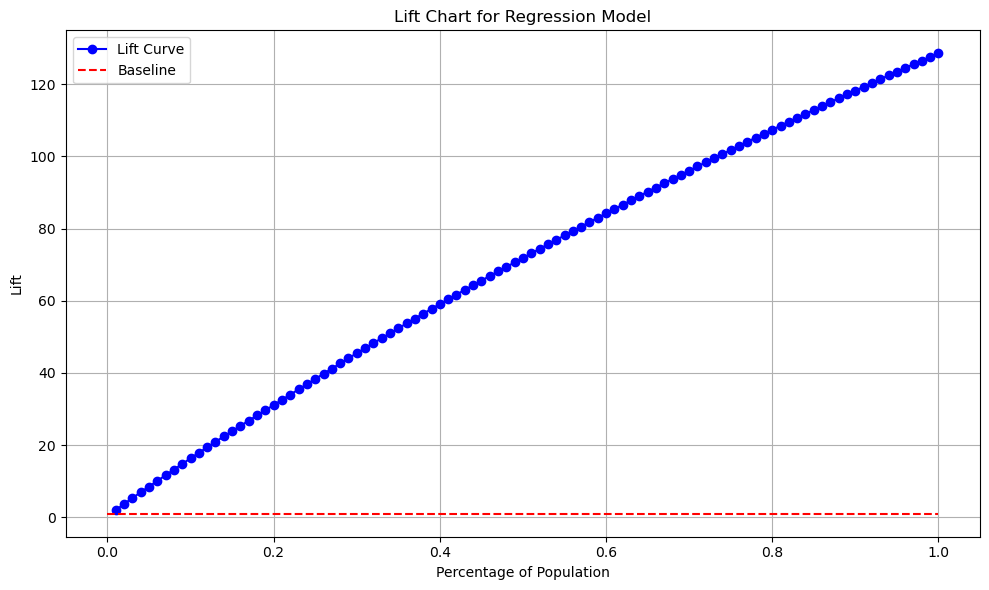

In [31]:
lift_chart_regression(y_test,predictions_test)